# Disease Classification in Plant
Potato is a plant that is susceptible to various kinds of diseases. Here we are using the **plant village dataset** which contains the images of various plants like potato, tomato etc.
In this project we would be specifically looking into the **potato plant** and try to classify them into three types of conditions:
1. Early Blight
2. Late Blight
3. Healthy

For the project we would be experimenting with various kinds of data preprocessing and models and variations of the parameters and hyperparameter and aim to amplify the precision and recall of the model for best performance case of the model.

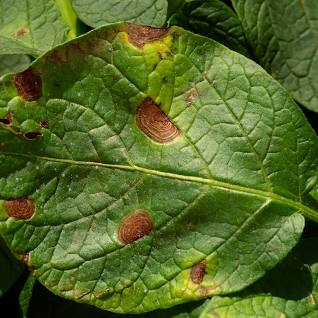 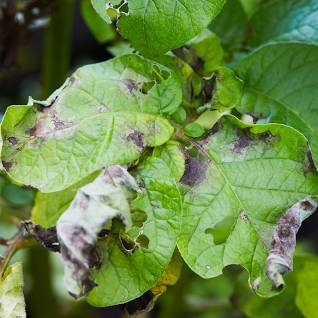
<br/> &emsp; &emsp; &emsp; *Figure: Early blight*&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; *Figure: Late blight*

For the project we would be going through the workflow:
```python
Dataset Acquisition -> Dataset Batching -> Data Preprocessing -> Model Selection and Building -> Model Tuning -> API building -> Frontend
```

The data was acquired through the free platform kaggle with the link:
> https://www.kaggle.com/datasets/arjuntejaswi/plant-village

# Importing libraries
We start by importing the libraries and modules that we would be using throughout the project
<br/> <br/>
The list of all the libraries used in the project and their versions can be found in  `requirements.txt`

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline

# Setting the images for batches
We now set the images that are downloaded into batches using the tensorflow and the respective modules

All of our images are of `256x256` size

In [4]:
# CONSTANTS FOR THE PROJECT

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [5]:
plant_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../Dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

The above code imported all of the classes of all of the plants.
Lets check them!

In [ ]:
plant_class_names = plant_dataset.class_names
plant_class_names

['Pepper', 'Potato', 'Tomato']

### Importing only the potato plant data

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory="../Dataset/Potato/",
    image_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
type(dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

In [ ]:
potato_classes = dataset.class_names
potato_classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

Yes, there are three types of potato images

In [ ]:
len(dataset)

68

In [ ]:
(1000*3)/32

93.75

# Length of dataset
The length of the dataset is **68** because <br/>
The **1000** images are divided into batches of **32** images which results in **68** batches

In [ ]:
# Checking the type of dataset
type(dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0]


# Batch Information
### (32, 256, 256, 3)<br/>
32: Number of images in the batch
<br/>256: Number of pixels in height and width <br/>3: Number of channels, here **RGB** <br/><br/>
There are currently three channels in the image batches which are
1. Red
2. Green
3. Blue <br/>
and the image is of size 256x256

There are three classes 0 1 2 for healthy, late blight, early blight

In [ ]:
# Image Information
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)
    print(image_batch[0][0].numpy())

(256, 256, 3)
[[118. 116. 130.]
 [111. 109. 123.]
 [104. 102. 116.]
 [102. 100. 114.]
 [104. 102. 116.]
 [106. 104. 118.]
 [104. 102. 116.]
 [101.  99. 113.]
 [111. 109. 123.]
 [125. 123. 137.]
 [130. 128. 142.]
 [120. 118. 132.]
 [112. 110. 124.]
 [116. 114. 128.]
 [118. 116. 130.]
 [116. 114. 128.]
 [120. 118. 132.]
 [117. 115. 129.]
 [113. 111. 125.]
 [110. 108. 122.]
 [116. 114. 128.]
 [126. 124. 138.]
 [130. 128. 142.]
 [128. 126. 140.]
 [135. 133. 147.]
 [135. 133. 147.]
 [128. 126. 140.]
 [119. 117. 131.]
 [118. 116. 130.]
 [125. 123. 137.]
 [129. 127. 141.]
 [127. 125. 139.]
 [104. 100. 114.]
 [121. 117. 131.]
 [122. 118. 132.]
 [110. 106. 120.]
 [105. 101. 115.]
 [105. 101. 115.]
 [112. 108. 122.]
 [128. 124. 138.]
 [111. 107. 121.]
 [114. 110. 124.]
 [116. 112. 126.]
 [126. 122. 136.]
 [135. 131. 145.]
 [122. 118. 132.]
 [104. 100. 114.]
 [103.  99. 113.]
 [122. 118. 132.]
 [108. 104. 118.]
 [109. 105. 119.]
 [121. 117. 131.]
 [107. 103. 117.]
 [114. 110. 124.]
 [141. 137. 15

## Visualizing the image

In [ ]:
type(potato_classes)

list

In [ ]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('int64'))
    plt.title(potato_classes[label_batch[0].split("__")])
    plt.axis("off")

NameError: name 'dataset' is not defined

Lets display 20 more images

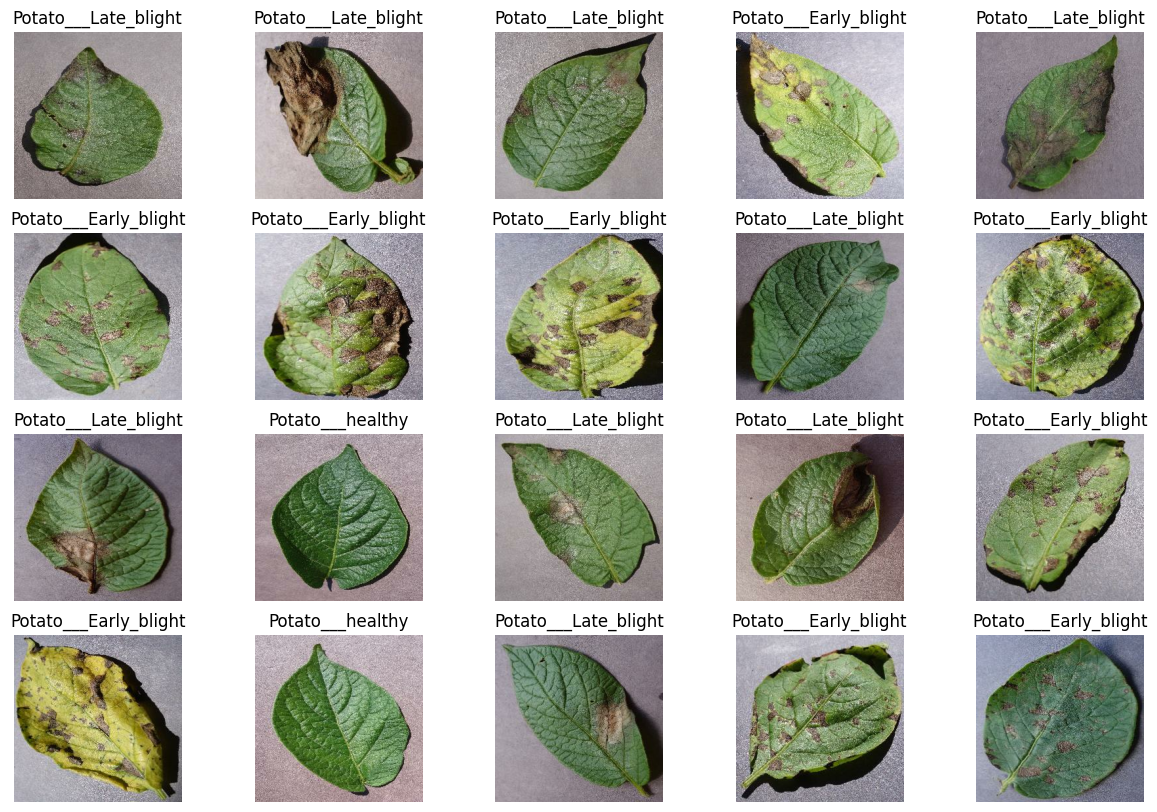

In [ ]:
for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(15,10))
    for i in range(20):
        plt.subplot(4,5, i+1)
        plt.imshow(image_batch[i].numpy().astype('int64'))
        plt.title(potato_classes[label_batch[i]])
        plt.axis("off")